# Create Datasets

We have written several pre-made datasets based on [PyG's dataset specifications](https://pytorch-geometric.readthedocs.io/en/latest/tutorial/create_dataset.html) and provide easy ways to help you build the subsets of data you need!

In [1]:
from qm9star_query.dataset.base_dataset import BaseQM9starDataset, transform_data
from qm9star_query.dataset.sub_datasets import (
    NeutralQM9starDataset,
    CationQM9starDataset,
    AnionQM9starDataset,
    RadicalQM9starDataset,
)

As with several of the dataset classes imported above, the `BaseQM9starDataset` class is a base class that is not recommended to be used directly. Instead, you should use one of the subclasses that are defined in the `qm9star_query.dataset.sub_datasets` module, or create your own subclass of `BaseQM9starDataset`.

If you are using these dataset classes for the first time, you must specify the PostgreSQL database instance to which you need to connect in the initialisation. How to deploy it is described in the [download_and_deploy_qm9star](1-download_and_deploy_qm9star.md).

After executing the following code, a subset of the specified range will be downloaded from the QM9star database and cached in npz format. The dataset will then execute the `process` method to transform each piece of data into a tensor based on the `transform` function passed in.You can replace the `transform` function as per your requirement.

In [2]:
neutral_dataset = NeutralQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",
    port=35432,
    db="qm9star",
    dataset_name="qm9star_neutral",
    block_num=5,
    log=True,
    transform=transform_data,
)

In [3]:
neutral_dataset[0]

Data(y=[1], pos=[15, 3], z=[15], energy=[1], energy_grad=[15, 3], formal_charges=[15], formal_num_radicals=[15], bonds=[15, 3])

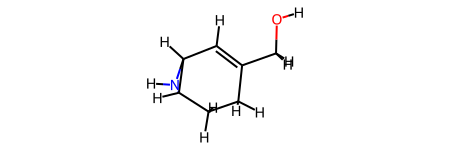

In [5]:
neutral_dataset.get_rdmol(100000)